# Introduction:

The fraud detection logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.   

Importing pandas,

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Loading financial dataset:

In [4]:
filepath='Financial Datasets For Fraud Detection.csv'
df= pd.read_csv(filepath)

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Check for the data type of all columns:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# A.Data Cleaning and Wrangling

Check for the missing data:


In [6]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count',ascending=False)

,count,%
step,0,0.0
type,0,0.0
amount,0,0.0
nameOrig,0,0.0
oldbalanceOrg,0,0.0
newbalanceOrig,0,0.0
nameDest,0,0.0
oldbalanceDest,0,0.0
newbalanceDest,0,0.0
isFraud,0,0.0


Conclusion:No missing data found. Analysing each features.Firstly,string data

In [7]:
df.select_dtypes('object')

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
6362615,CASH_OUT,C786484425,C776919290
6362616,TRANSFER,C1529008245,C1881841831
6362617,CASH_OUT,C1162922333,C1365125890
6362618,TRANSFER,C1685995037,C2080388513


Now let's check the numeric features.

In [8]:
df.select_dtypes(include = ['int64','float64'])

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


# B.Exploratory Data Analysis (EDA)


## 1. DATA PROFILES — PLOTS AND TABLES

Conduct EDA on the 'Capstone2-Fraud Detection' to examine relationships between variables and other patterns in the data.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [10]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [11]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


0    6354407
1       8213
Name: isFraud, dtype: int64


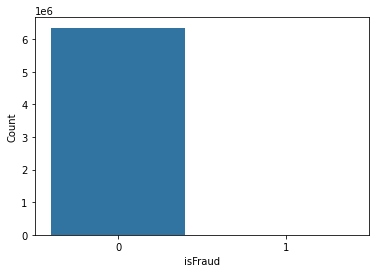

In [12]:

print(df.isFraud.value_counts())
sns.countplot(data=df, x='isFraud')
plt.ylabel('Count')
plt.show()

Count number of each type of transaction

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


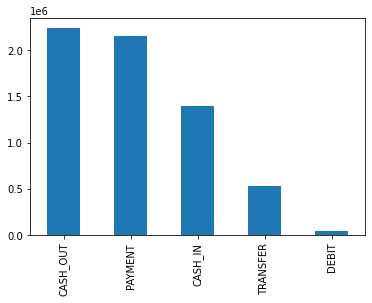

In [13]:
print(df.type.value_counts())
df.type.value_counts().plot(kind='bar')
plt.show()

Check for relationship between isFraud and isFlaggedFraud:

In [14]:
pd.crosstab(df.isFraud,df.isFlaggedFraud)

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


In [15]:
df.groupby('type')['isFraud','isFlaggedFraud'].sum()

C:\Users\61435\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4116,0
DEBIT,0,0
PAYMENT,0,0
TRANSFER,4097,16


Conclusion:Fraud occurs only in 2 type of transactions: TRANSFER and CASH_OUT
The type of transactions in which isFlaggedFraud is set : TRANSFER

### Histograms for each variable in df

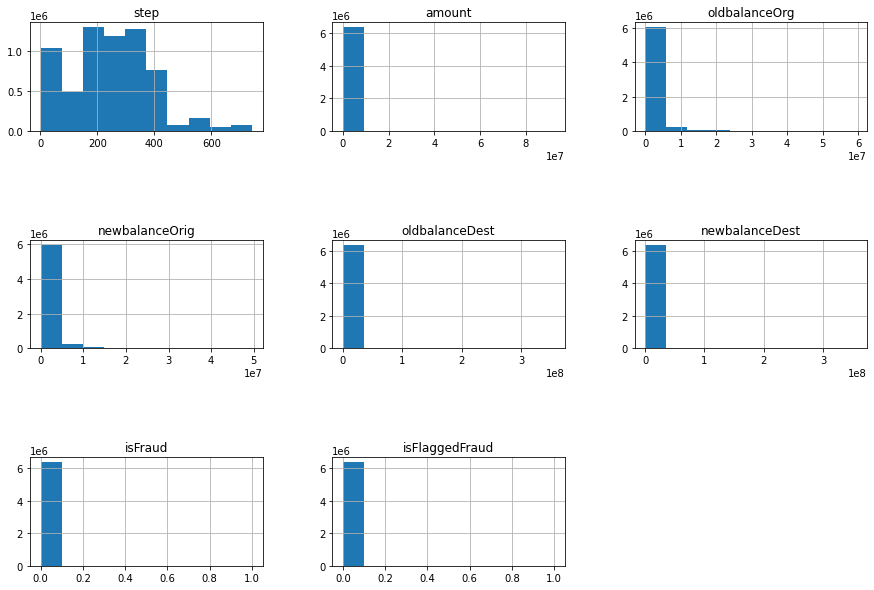

In [16]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=1)

Categorical variable: type
Check for the categorical variable in dataset:

<AxesSubplot:xlabel='type', ylabel='count'>

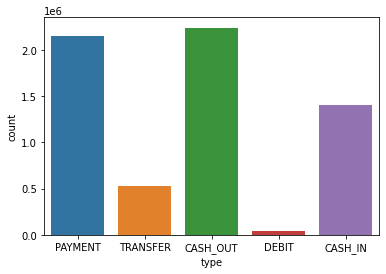

In [17]:
#select categorical variable 'type'
df_cat = df.select_dtypes(include = 'object').copy()
#get counts of each variable value
df_cat.type.value_counts()
#count plot for one variable
sns.countplot(data = df_cat, x = 'type')

### Reviewing for Outliers and Anamolies


Create a boxplot for every column in df

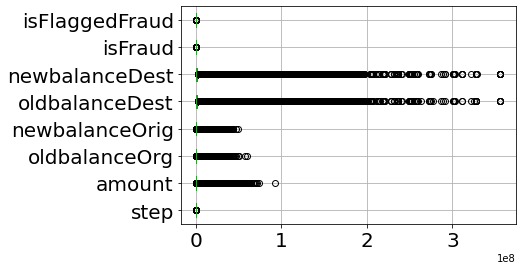

In [18]:

boxplot = df.boxplot(grid=True, vert=False,fontsize=20)

Conclusion:In these cases outliers are expected as acounts are not interlinked and Bank allows customers to place all types of transactions. 

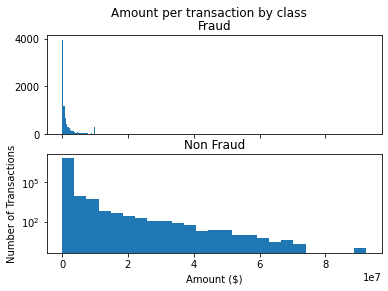

In [20]:
fraud = df[df['isFraud']==1]
nonfraud = df[df['isFraud']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 25
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(nonfraud.amount, bins = bins)
ax2.set_title('Non Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

Conclusion:Less number of transaction amount in fraud comapare to non fraud data

## 2. DATA RELATIONSHIPS

Create the correlation matrix heat map:Correlation coefficients for each variable in the dataset

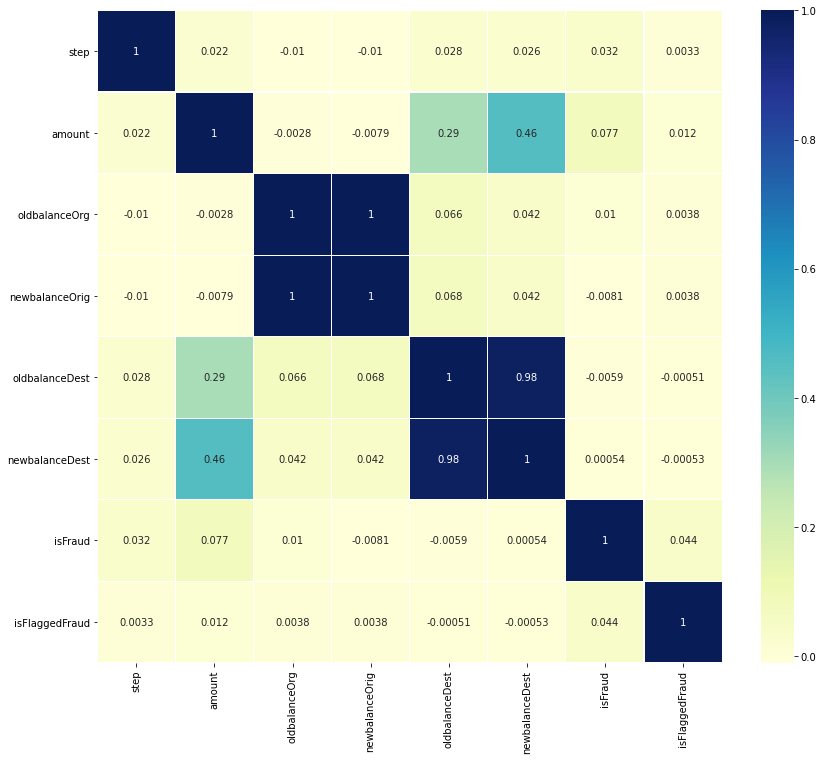

In [21]:

plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

Conclusion:
OldbalanceOrg, NewbalanceOrig are closely related.
Similarly, OldbalanceDest, NewbalanceDest are closely related.
isFraud is related to amount coloumn. So this will be the coloumn on which we need to work on. 
Moderately Strong Negative Correlation:NewbalanceDest and amount

Creat pair plots

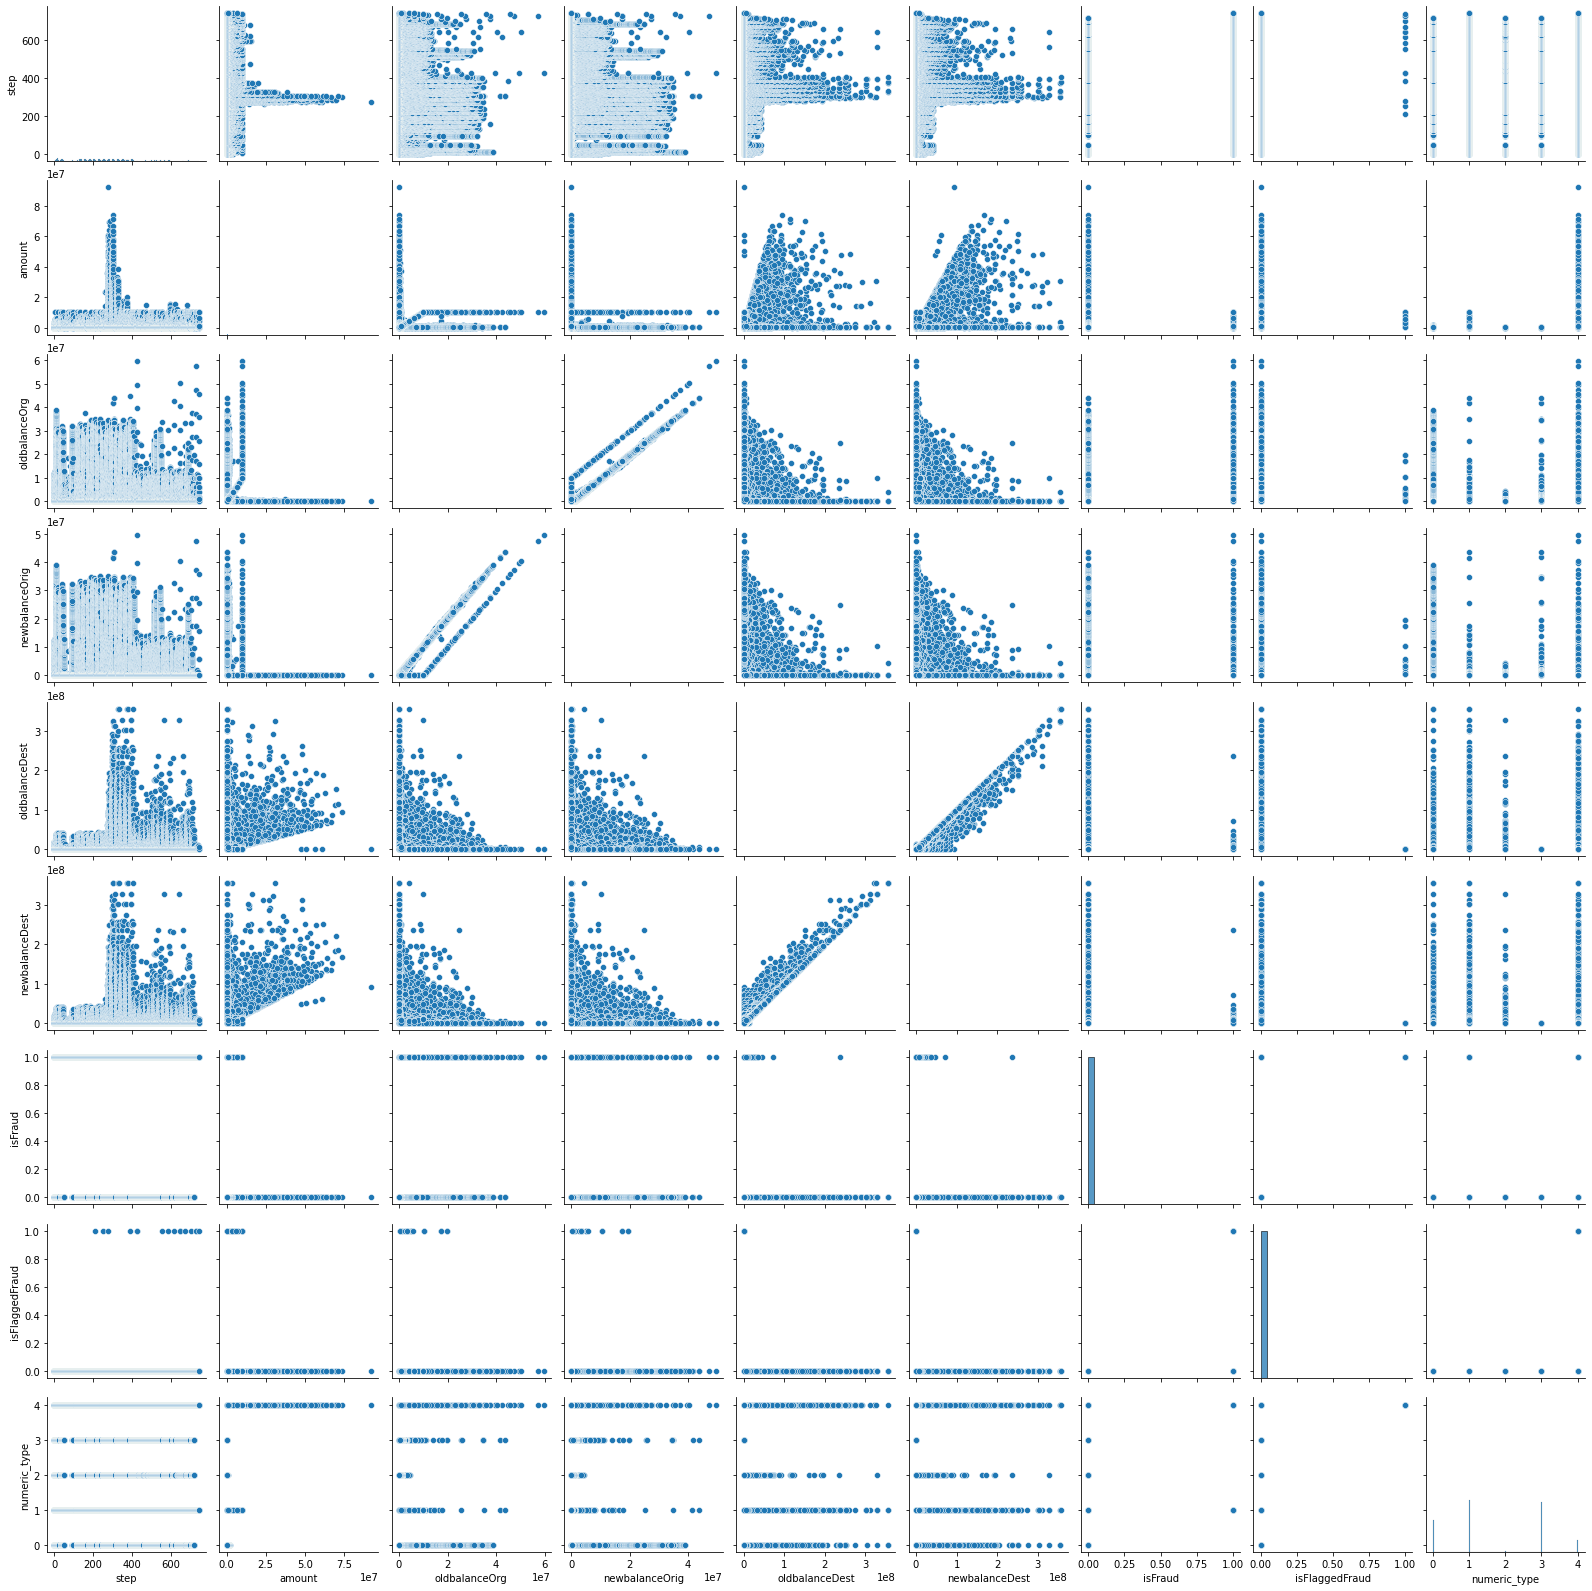

In [63]:
#pair plots
sns.pairplot(df)
plt.show()

## 3. IDENTIFYING AND CREATING FEATURES

Check PCA for the correrated features:

In [14]:
features_array = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
# Separating out the features
features= df.loc[:, features_array].values
print(features)
# Standardizing the features
standard_features = StandardScaler().fit_transform(features)
print("**************************")
print(standard_features)

[[9.83964000e+03 1.70136000e+05 1.60296360e+05 0.00000000e+00
  0.00000000e+00]
 [1.86428000e+03 2.12490000e+04 1.93847200e+04 0.00000000e+00
  0.00000000e+00]
 [1.81000000e+02 1.81000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 ...
 [6.31140928e+06 6.31140928e+06 0.00000000e+00 6.84888400e+04
  6.37989811e+06]
 [8.50002520e+05 8.50002520e+05 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [8.50002520e+05 8.50002520e+05 0.00000000e+00 6.51009911e+06
  7.36010163e+06]]
**************************
[[-2.81559923e-01 -2.29810037e-01 -2.37621696e-01 -3.23813895e-01
  -3.33411405e-01]
 [-2.94767262e-01 -2.81359380e-01 -2.85812295e-01 -3.23813895e-01
  -3.33411405e-01]
 [-2.97554804e-01 -2.88653782e-01 -2.92441707e-01 -3.23813895e-01
  -3.33411405e-01]
 ...
 [ 1.01539526e+01  1.89649113e+00 -2.92441707e-01 -3.03665258e-01
   1.40302700e+00]
 [ 1.10976490e+00  5.58104668e-03 -2.92441707e-01 -3.23813895e-01
  -3.33411405e-01]
 [ 1.10976490e+00  5.58104668e-03 -2.92441707e-01  1.5913

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [27]:
finalDf = pd.concat([principalDf, df[['isFraud']]], axis = 1)

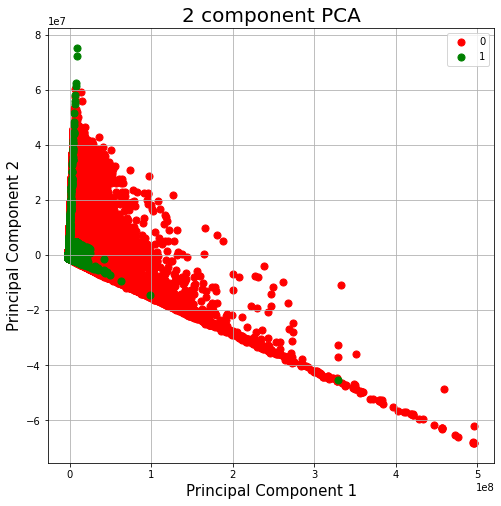

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['isFraud'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [29]:
pca.explained_variance_ratio_

array([0.59007217, 0.39557502])

Conclusion:the first principal component contains 44.98% of the variance and the second principal component contains 39.28% of the variance. Together, the two components contain 84.26% of the information. Therefore, inneed to include other feature 'type' in consideration.

# 4. Feature Engineering

## Categorical data: As there are no missing data, let's analyse the categorical data in the dataframe.

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


From above information we can conclude that type, nameOrig and nameDest are of object type.

In [8]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df['type'])
df['numeric_type'] = enc.transform(df['type'])

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  numeric_type    int32  
dtypes: float64(5), int32(1), int64(3), object(3)
memory usage: 558.2+ MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,numeric_type
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3


In [11]:
df_new=df.drop(['type'],axis=1)

In [12]:
df_new.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,numeric_type
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,3
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,3
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,3


## Check for outliers

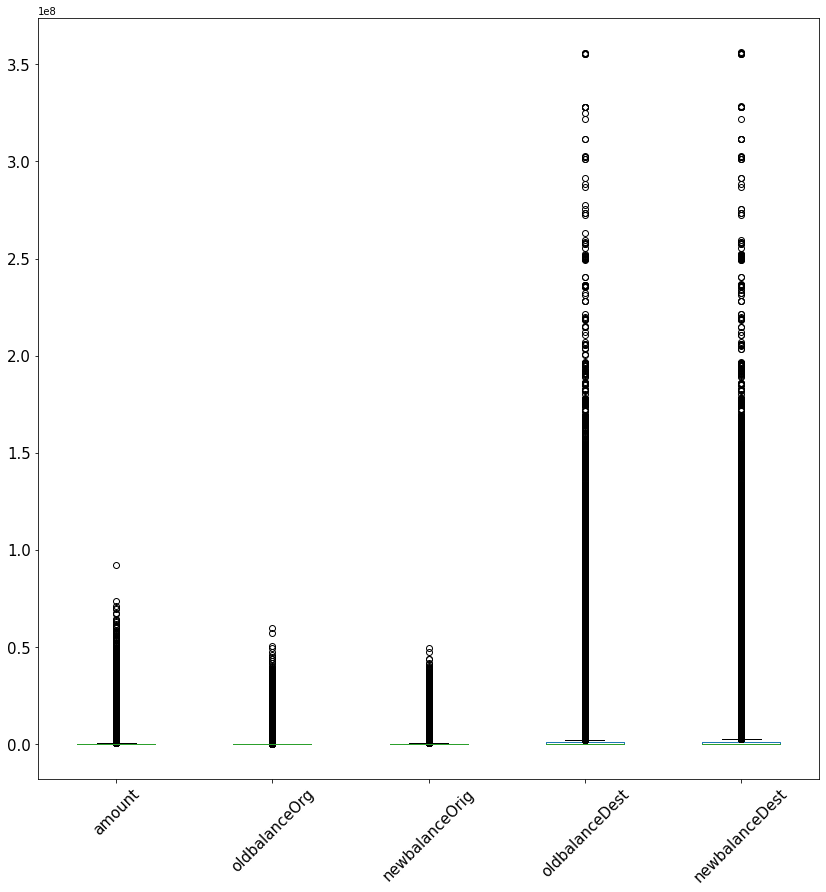

In [15]:
df_new[features_array].boxplot(figsize=(14,14),grid=False, rot=45, fontsize=15)
plt.show()

Outliers are excepted for this data set as outliers are expainable.

Conclusion:  Only feature on which which was needed to be modified was 'type' as it was categorical in nature.

## Difference between balances

In [21]:
df_new['difference_balanceOrg']=df_new['oldbalanceOrg']-df_new['newbalanceOrig']
df_new['difference_balanceDest']=df_new['newbalanceDest']-df_new['oldbalanceDest']
df_new.head(20)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,numeric_type,difference_balanceOrg,difference_balanceDest
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,3,9839.64,0.00
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,3,1864.28,0.00
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,4,181.00,0.00
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,1,181.00,-21182.00
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,3,11668.14,0.00
5,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,3,7817.71,0.00
6,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,3,7107.77,0.00
7,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,3,7861.64,0.00
8,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,3,2671.00,0.00
9,1,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,2,5337.77,-1549.21


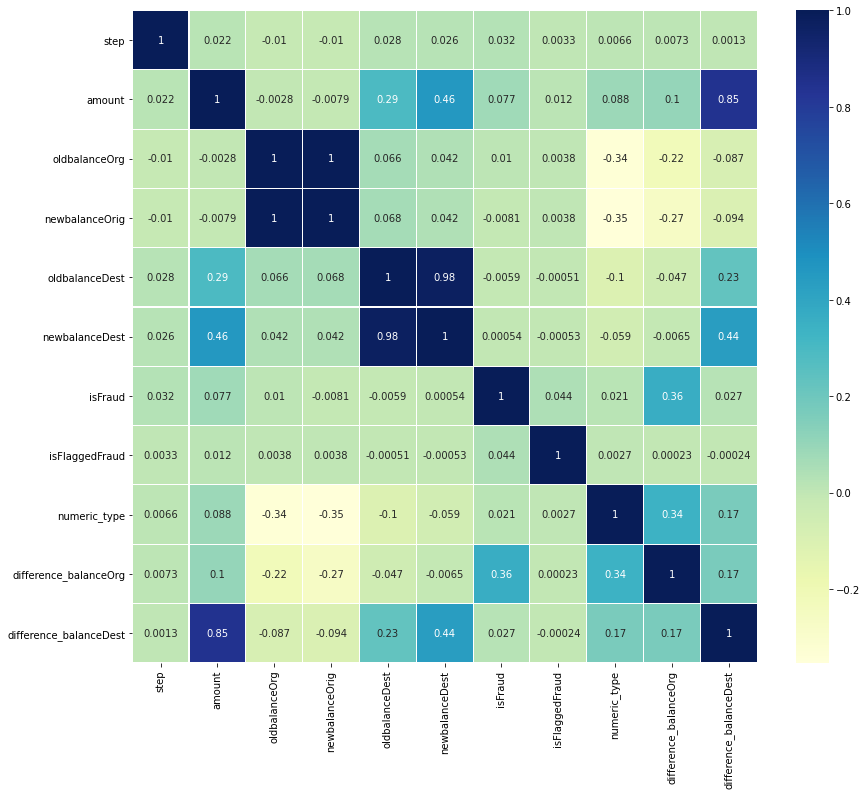

In [22]:
plt.figure(figsize=(14,12))
sns.heatmap(df_new.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

## Test train split

In [11]:
from sklearn.model_selection import train_test_split
X=df_new.drop(['isFlaggedFraud'],axis=1).values
y=df_new['isFlaggedFraud'].values

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)

In [13]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[300 280879.48 'C1674722103' ... 3071991.7 0 0]
 [309 56700.4 'C2102178789' ... 56700.4 0 1]
 [178 40683.66 'C612092002' ... 712232.9 0 0]
 ...
 [19 380846.63 'C111295737' ... 0.0 0 0]
 [185 4375.36 'C436864017' ... 0.0 0 3]
 [181 36454.06 'C653703281' ... 193829.08 0 1]]
[[692 96863.75 'C1505345926' ... 0.0 0 0]
 [177 242779.25 'C1897927808' ... 409788.22 0 1]
 [41 3926.87 'C1361786853' ... 0.0 0 3]
 ...
 [308 225395.82 'C74635232' ... 8398697.76 0 1]
 [155 217581.06 'C778605405' ... 0.0 0 0]
 [348 24085.21 'C1793195784' ... 0.0 0 3]]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
